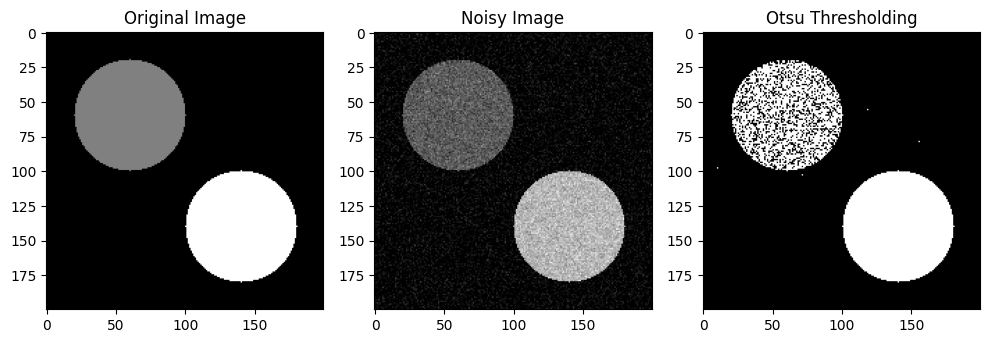

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# blank grayscale image
image = np.zeros((200, 200), dtype=np.uint8)

# object 1 - Circle 1, 
cv2.circle(image, (60, 60), 40, 85, -1) 
# object 2 - Circle 2
cv2.circle(image, (140, 140), 40, 170, -1)  

# Add Gaussian noise
noise = np.random.normal(0, 20, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Apply the Otsu's thresholding
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot the images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.title("Original Image"), plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2), plt.title("Noisy Image"), plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3), plt.title("Otsu Thresholding"), plt.imshow(otsu_thresh, cmap='gray')
plt.tight_layout()
plt.show()


In [13]:

def region_growing(image, seed_points, threshold=50):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    for seed in seed_points:
        x, y = seed
        seed_value = image[x, y]
        to_visit = [(x, y)]

        while to_visit:
            cx, cy = to_visit.pop()
            if visited[cx, cy]:
                continue
            visited[cx, cy] = True

            if abs(int(image[cx, cy]) - int(seed_value)) <= threshold:
                segmented[cx, cy] = 255
                # 4-neighbors
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nx, ny = cx + dx, cy + dy
                    if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                        to_visit.append((nx, ny))
    return segmented





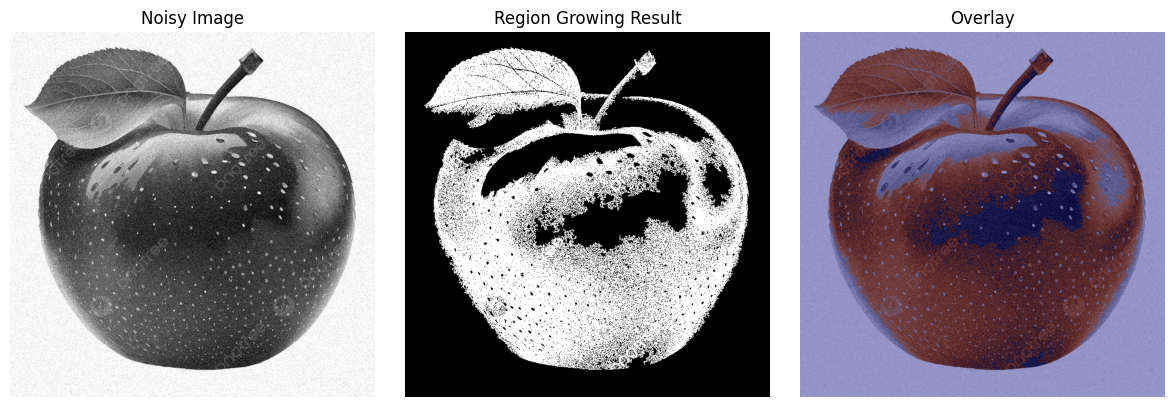

In [14]:

image = np.zeros((200, 200), dtype=np.uint8)
image = cv2.imread('AppleImage.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise = np.random.normal(0, 20, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Define seed point
seeds = [(100, 100)]

# Apply region growing
result = region_growing(noisy_image, seeds, threshold=50)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Region Growing Result")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(noisy_image, cmap='gray')
plt.imshow(result, cmap='jet', alpha=0.4)
plt.axis('off')

plt.tight_layout()
plt.show()